In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time
import math    #for using floor in creating minibatches


#core packages
import numpy as np
import matplotlib.pyplot as plt

#custom module
from dataPrep import load_dataset, load_sample_dataset
from dataPrep import prep_dataset, rand_mini_batches

from finalModelUtils import *
from ffnn import *

np.random.seed(1)
%matplotlib inline

## Loading Datasets

In [2]:
#loading complete dataset
train_x_orig, train_y_orig, dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = load_dataset()

In [3]:
#loading Sample dataset
sample_size = 100
train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample = load_sample_dataset(sample_size)

print("Sample Size : %d%%\n"%(sample_size))
print("Data\t\t\t","Complete Dataset\t","Sample Dataset\t")
print("================================================================")
print("Training Set Images:\t"+ str(train_x_orig.shape)+"\t\t"+ str(train_x_sample.shape))
print("Training Set Labels:\t"+ str(train_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Training Set Images:\t"+ str(dev_x_orig.shape)+"\t\t"+ str(dev_x_sample.shape))
print("Training Set Labels:\t"+ str(dev_y_orig.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_orig.shape)+"\t\t"+ str(test_x_sample.shape))
print("Test Set Labels:\t"+str(test_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("================================================================")


Sample Size : 100%

Data			 Complete Dataset	 Sample Dataset	
Training Set Images:	(60000, 28, 28)		(60000, 28, 28)
Training Set Labels:	(60000, 1)		(60000, 1)
Training Set Images:	(5000, 28, 28)		(5000, 28, 28)
Training Set Labels:	(5000, 1)		(5000, 1)
Test Set Images:	(5000, 28, 28)		(5000, 28, 28)
Test Set Labels:	(5000, 1)		(5000, 1)


## Preparing Datasets

In [4]:
# Preparing the Dataset (Flattening and Normalizing)
train_x_norm,train_y_encoded, dev_x_norm,dev_y_encoded, test_x_norm, test_y_encoded = prep_dataset(train_x_sample, train_y_sample, dev_x_sample, dev_y_sample, test_x_sample, test_y_sample)
print("Data\t\t\t","Before Processing\t","After Processing")
print("=================================================================")
print("Training Set Images:\t" + str(train_x_sample.shape)+"\t\t"+ str(train_x_norm.shape))
print("Training Set Labels:\t" + str(train_y_sample.shape)+"\t\t"+ str(train_y_encoded.shape))
print("Dev Set Images:\t\t" + str(dev_x_sample.shape)+"\t\t"+ str(dev_x_norm.shape))
print("Dev Set Labels:\t\t" + str(dev_y_sample.shape)+"\t\t"+ str(dev_y_encoded.shape))
print("Test Set Images:\t" + str(test_x_sample.shape)+"\t\t"+ str(test_x_norm.shape))
print("Test Set Labels:\t" + str(test_y_sample.shape)+"\t\t"+ str(test_y_encoded.shape))
print("=================================================================")

Data			 Before Processing	 After Processing
Training Set Images:	(60000, 28, 28)		(784, 60000)
Training Set Labels:	(60000, 1)		(10, 60000)
Dev Set Images:		(5000, 28, 28)		(784, 5000)
Dev Set Labels:		(5000, 1)		(10, 5000)
Test Set Images:	(5000, 28, 28)		(784, 5000)
Test Set Labels:	(5000, 1)		(10, 5000)


## Model Implementation

In [5]:
layers_dim = init_layers(train_x_norm, train_y_encoded, hidden_layers = [800,300])

In [6]:
hyperParams = init_hyperParams(alpha = 0.001690971260603747, num_epoch = 25, mini_batch_size = 280,lambd = 0.9,keep_probs = [0.8,0.8,])


Epoch: 1/25
60000/60000 [==========> 100%] - 368.50s | loss: 0.0864 | acc: 0.9740 | Val loss: 0.1035 | Val acc: 0.9688 
Epoch: 2/25
60000/60000 [==========> 100%] - 411.95s | loss: 0.0469 | acc: 0.9855 | Val loss: 0.0792 | Val acc: 0.9744 
Epoch: 3/25
60000/60000 [==========> 100%] - 379.74s | loss: 0.0336 | acc: 0.9895 | Val loss: 0.0694 | Val acc: 0.9778 
Epoch: 4/25
60000/60000 [==========> 100%] - 386.61s | loss: 0.0243 | acc: 0.9921 | Val loss: 0.0705 | Val acc: 0.9786 
Epoch: 5/25
60000/60000 [==========> 100%] - 397.56s | loss: 0.0160 | acc: 0.9946 | Val loss: 0.0668 | Val acc: 0.9798 
Epoch: 6/25
60000/60000 [==========> 100%] - 384.53s | loss: 0.0220 | acc: 0.9923 | Val loss: 0.0825 | Val acc: 0.9778 
Epoch: 7/25
60000/60000 [==========> 100%] - 367.49s | loss: 0.0263 | acc: 0.9915 | Val loss: 0.1059 | Val acc: 0.9704 
Epoch: 8/25
60000/60000 [==========> 100%] - 367.09s | loss: 0.0078 | acc: 0.9977 | Val loss: 0.0788 | Val acc: 0.9802 
Epoch: 9/25
60000/60000 [==========> 10

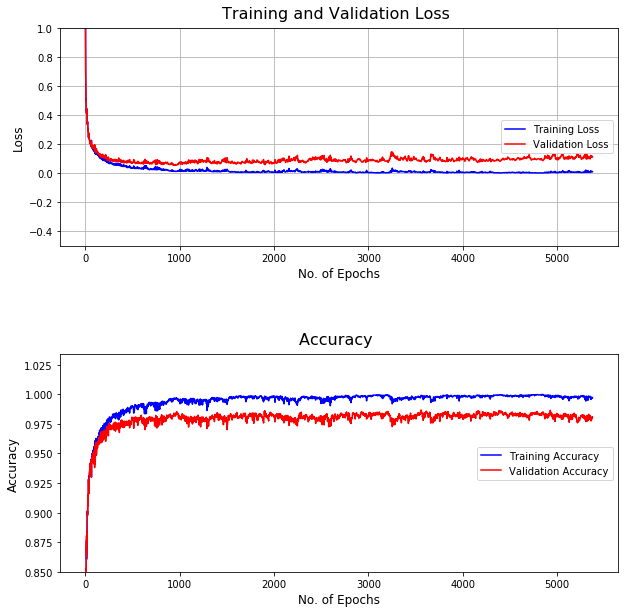

In [7]:
parameters = train(train_x_norm, train_y_encoded,dev_x_norm, dev_y_encoded,layers_dim, hyperParams, initialization = "he", optimizer = 'adam',regularizer = None)

## Making Predictions

In [8]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,parameters)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,parameters)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,parameters)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9969 	| 0.0031 	|
| Dev       | 0.9804 	| 0.0196 	|
| Test      | 0.9806 	| 0.0194 	|
+===========+===========+===============+


## Confusion Matrix

In [9]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

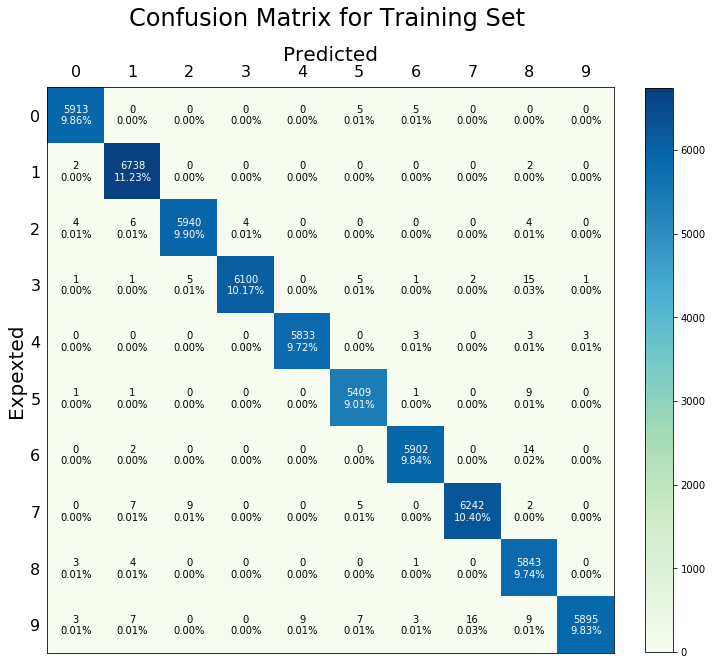

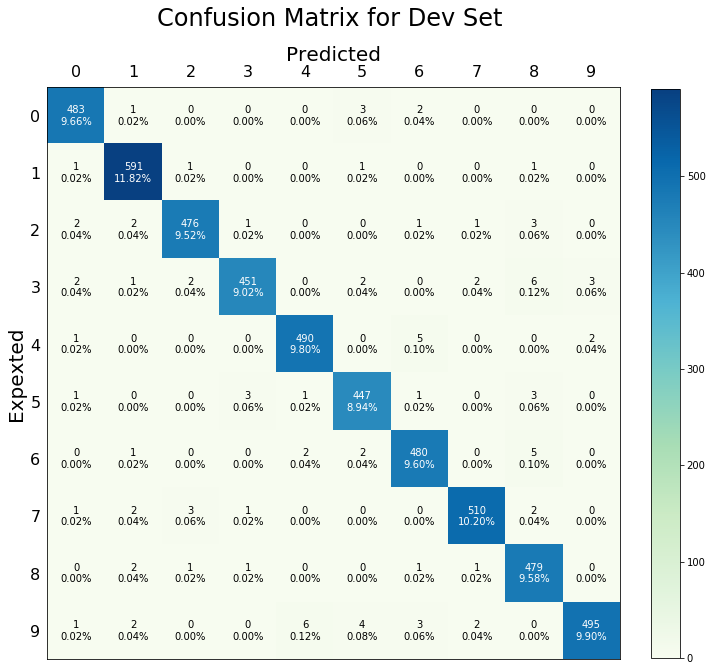

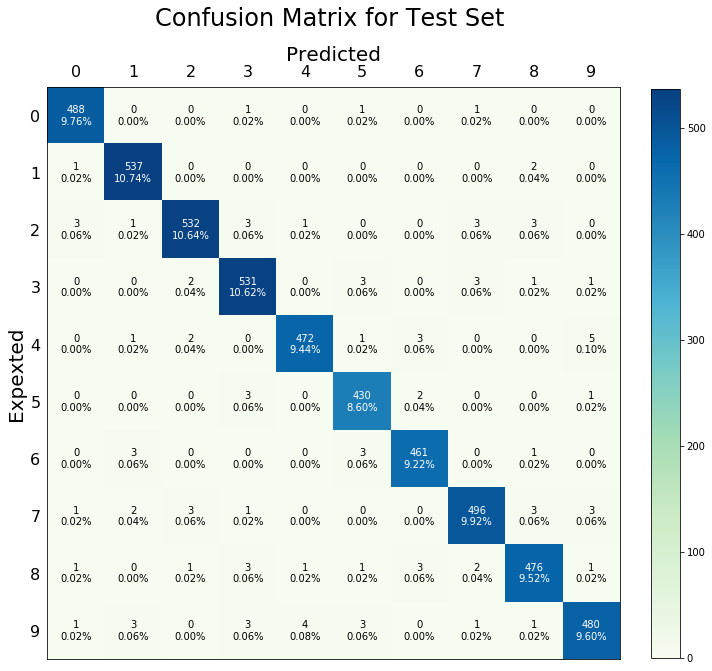

In [10]:
#plotting the confusion matrix   
plot_confusion_matrix(cm_train, dataset = "training")
plot_confusion_matrix(cm_dev, dataset = "dev")
plot_confusion_matrix(cm_test, dataset = "test")

## Prediction Summary

In [11]:
train_metrics, train_macro_metrics, train_acc = model_metrics(cm_train)
metric_summary(train_metrics, train_macro_metrics, train_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.99764 	|  0.99831 	|  0.99797 	|
| 1 		|  0.99586 	|  0.99941 	|  0.99763 	|
| 2 		|  0.99765 	|  0.99698 	|  0.99731 	|
| 3 		|  0.99934 	|  0.99494 	|  0.99714 	|
| 4 		|  0.99846 	|  0.99846 	|  0.99846 	|
| 5 		|  0.99595 	|  0.99779 	|  0.99687 	|
| 6 		|  0.99763 	|  0.99730 	|  0.99746 	|
| 7 		|  0.99712 	|  0.99633 	|  0.99673 	|
| 8 		|  0.99017 	|  0.99863 	|  0.99438 	|
| 9 		|  0.99932 	|  0.99092 	|  0.99510 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.99692 	|  0.99691 	|  0.99691 	|
+===============+===============+===============+===============+

 Accuracy 		  0.99692


In [12]:
dev_metrics, dev_macro_metrics, dev_acc = model_metrics(cm_dev)
metric_summary(dev_metrics, dev_macro_metrics, dev_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.98171 	|  0.98773 	|  0.98471 	|
| 1 		|  0.98173 	|  0.99328 	|  0.98747 	|
| 2 		|  0.98551 	|  0.97942 	|  0.98246 	|
| 3 		|  0.98687 	|  0.96162 	|  0.97408 	|
| 4 		|  0.98196 	|  0.98394 	|  0.98295 	|
| 5 		|  0.97386 	|  0.98026 	|  0.97705 	|
| 6 		|  0.97363 	|  0.97959 	|  0.97660 	|
| 7 		|  0.98837 	|  0.98266 	|  0.98551 	|
| 8 		|  0.95992 	|  0.98763 	|  0.97358 	|
| 9 		|  0.99000 	|  0.96491 	|  0.97730 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.98036 	|  0.98010 	|  0.98017 	|
+===============+===============+===============+===============+

 Accuracy 		  0.98040


In [13]:
test_metrics, test_macro_metrics, test_acc = model_metrics(cm_test)
metric_summary(test_metrics, test_macro_metrics, test_acc)

+===============+===============+===============+===============+
| Label 	| Precision 	| Recall 	| F1 Score 	|
+===============+===============+===============+===============+
| 0 		|  0.98586 	|  0.99389 	|  0.98986 	|
| 1 		|  0.98172 	|  0.99444 	|  0.98804 	|
| 2 		|  0.98519 	|  0.97436 	|  0.97974 	|
| 3 		|  0.97431 	|  0.98152 	|  0.97790 	|
| 4 		|  0.98745 	|  0.97521 	|  0.98129 	|
| 5 		|  0.97285 	|  0.98624 	|  0.97950 	|
| 6 		|  0.98294 	|  0.98504 	|  0.98399 	|
| 7 		|  0.98024 	|  0.97446 	|  0.97734 	|
| 8 		|  0.97741 	|  0.97342 	|  0.97541 	|
| 9 		|  0.97760 	|  0.96774 	|  0.97264 	|
+===============+===============+===============+===============+
| Macro Avg 	|  0.98056 	|  0.98063 	|  0.98057 	|
+===============+===============+===============+===============+

 Accuracy 		  0.98060


## Visualizing Prediction

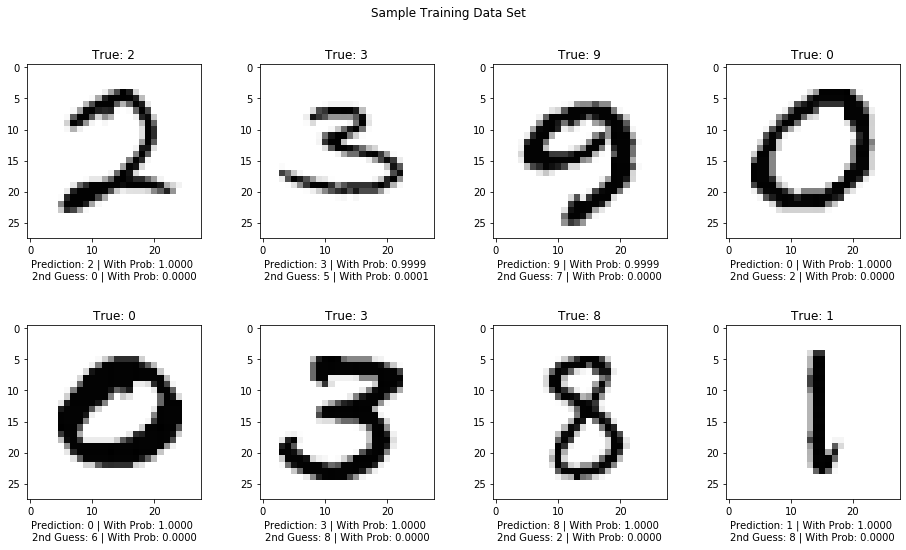

In [14]:
visualize_prediction(train_x_sample, train_y_sample.T, prediction_train, dataset = "training")

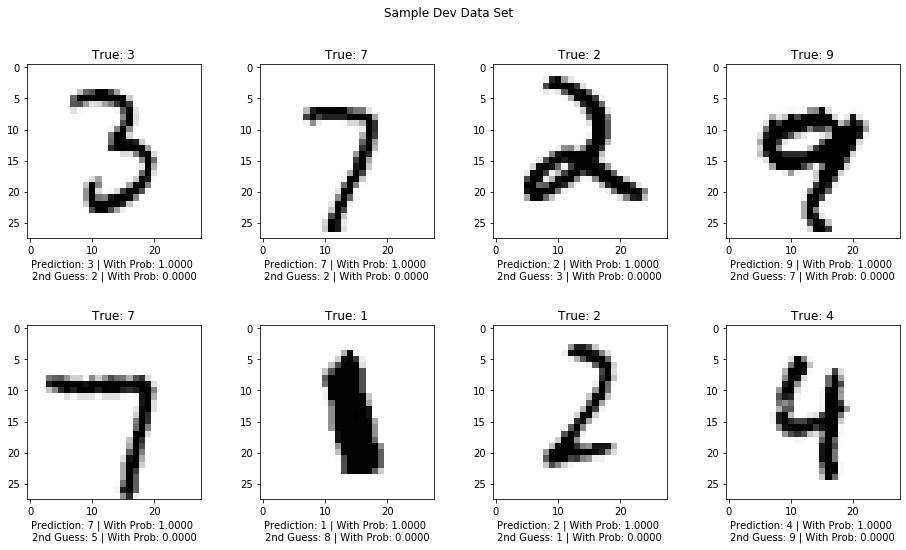

In [15]:
visualize_prediction(dev_x_sample, dev_y_sample.T, prediction_dev, dataset = "dev")

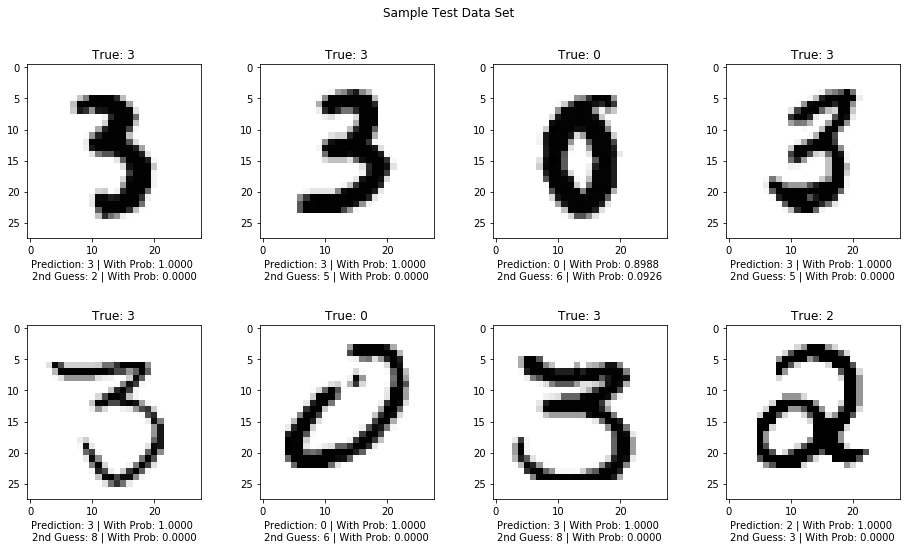

In [16]:
visualize_prediction(test_x_sample, test_y_sample.T, prediction_test, dataset = "test")

## Visualizing Mislabelled Images

Total Mislabelled Images: 185


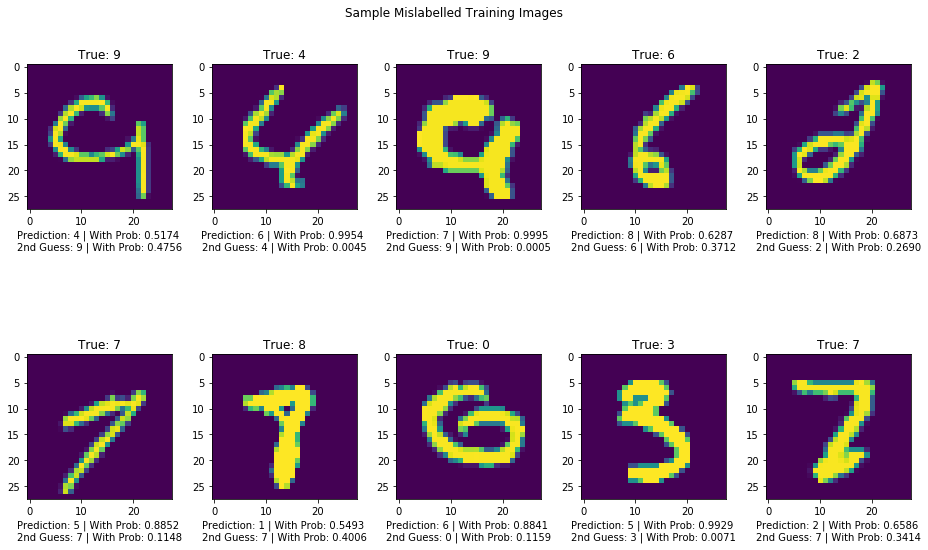

In [17]:
visualize_mislabelled_images(train_x_sample, train_y_sample.T,prediction_train,dataset = "training")

Total Mislabelled Images: 98


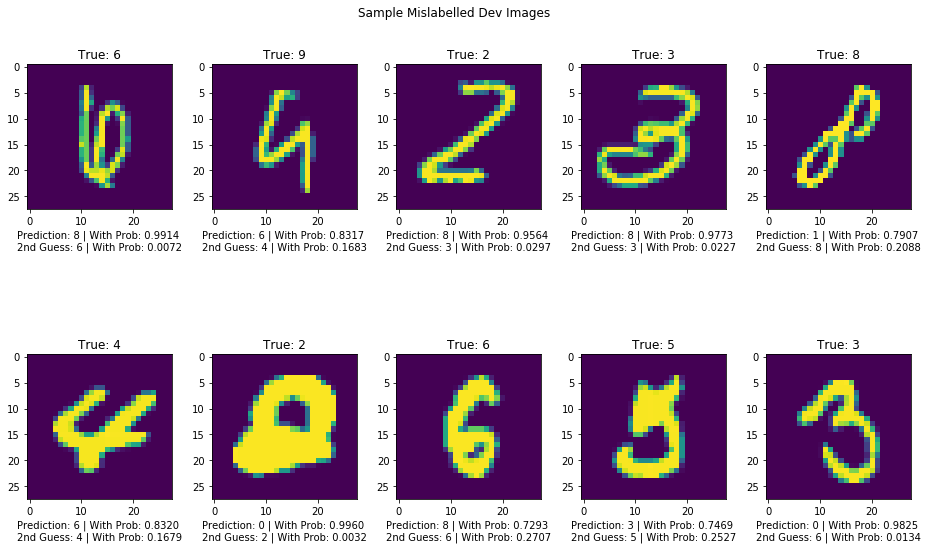

In [18]:
visualize_mislabelled_images(dev_x_sample, dev_y_sample.T,prediction_dev,dataset = "dev")

Total Mislabelled Images: 97


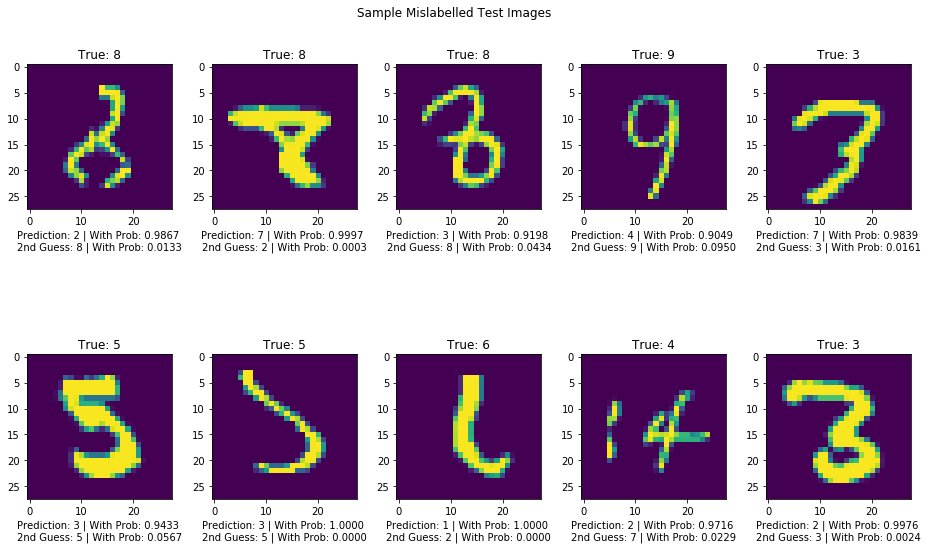

In [19]:
visualize_mislabelled_images(test_x_sample, test_y_sample.T,prediction_test,dataset = "test")

## Making Prediction on Real World Image

In [20]:
from PIL import Image
from dataPrep import one_hot_encoding

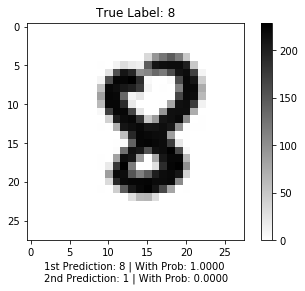

In [21]:
image_name = "8_1.jpg" 
label = np.array([8]).reshape(1,1)

fname = "dataset/" + image_name

image_data =255 - np.asarray(Image.open(fname).convert('L').resize((28,28)))
image_flattened = image_data.reshape(image_data.shape[0]*image_data.shape[1],-1)
image_norm =(image_flattened/255.)

label_encoded = one_hot_encoding(label)

prediction,acc,_ = predict(image_norm, label_encoded, parameters)
    

first_lbl, first_prob = prediction["First Prediction"]
sec_lbl, sec_prob = prediction["Second Prediction"]

plt.title("True Label: "+ str(label.squeeze()))
plt.xlabel("1st Prediction: %d | With Prob: %.4f \n2nd Prediction: %d | With Prob: %.4f"%(first_lbl, first_prob, sec_lbl, sec_prob))
plt.imshow(image_data, interpolation ='nearest',cmap='binary')
plt.colorbar()


## Saving Trained Model

In [22]:
import datetime
d = datetime.datetime.now()

file_name = str(d) + " lr_mbs_tuned_final_model_adam"
print(file_name)
print(hyperParams)
#hyper parameter not saved along with any past model so loading may be different
params = {"hyperParams":hyperParams,
         "parameters": parameters
        }

save_model(file_name = file_name, parameters = params)

2020-05-21 17:37:39.809013 lr_mbs_tuned_final_model_adam
{'learning_rate': 0.001690971260603747, 'num_epoch': 25, 'mini_batch_size': 280, 'lambda': 0.9, 'keep_probs': [0.8, 0.8], 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


## Loading Pre-Trained Model

In [27]:
# loaded_params = load_model(file_name = "final_model_adam_dropout") ##past saved model
loaded_params = load_model(file_name = "2020-05-21 17:37:39.809013 lr_mbs_tuned_final_model_adam")
trained_params = loaded_params["parameters"]
trained_hyper_params = loaded_params["hyperParams"]

In [24]:
L = len(trained_params) // 2
print("Total Layers %d: "%L)

for l in range(L):
    print(trained_params["W" + str(l+1)].shape)
print(trained_hyper_params)

Total Layers 3: 
(800, 784)
(300, 800)
(10, 300)
{'learning_rate': 0.001690971260603747, 'num_epoch': 25, 'mini_batch_size': 280, 'lambda': 0.9, 'keep_probs': [0.8, 0.8], 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08}


In [25]:
prediction_train,train_acc,_ = predict(train_x_norm, train_y_encoded,trained_params)
prediction_dev,dev_acc, _ = predict(dev_x_norm, dev_y_encoded,trained_params)
prediction_test,test_acc,_ = predict(test_x_norm, test_y_encoded,trained_params)

print("+===========+===========+===============+")
print("| Dataset   | Accuracy \t| Error Rate \t|") 
print("+===========+===========+===============+")
print("| Training  | %.4f \t| %.4f \t|"%(train_acc, 1-train_acc))
print("| Dev       | %.4f \t| %.4f \t|"%(dev_acc, 1-dev_acc))      
print("| Test      | %.4f \t| %.4f \t|"%(test_acc, 1-test_acc))      

print("+===========+===========+===============+")

+===========+===========+===============+
| Dataset   | Accuracy 	| Error Rate 	|
+===========+===========+===============+
| Training  | 0.9969 	| 0.0031 	|
| Dev       | 0.9804 	| 0.0196 	|
| Test      | 0.9806 	| 0.0194 	|
+===========+===========+===============+


In [ ]:
cm_train = confusion_matrix(train_y_sample,prediction_train)

cm_dev = confusion_matrix(dev_y_sample,prediction_dev)

cm_test = confusion_matrix(test_y_sample,prediction_test)

In [ ]:
metrics, macro_metrics, acc = model_metrics(cm_train)

In [ ]:
metric_summary(metrics, macro_metrics, acc)

In [ ]:
print(macro_metrics)